# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df = df.drop("Id", axis = 1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# Porcentaje de nulos
percent = pd.DataFrame((100*(df.isnull().sum()/len(df.index))).sort_values(ascending = False), columns = ["Percent_missing"])
percent
# Mostrar columnas con 20% o más de nulos
percent[percent['Percent_missing'] >= 20]

,Percent_missing
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# Seleccionar las columnas que hay que eliminar
eliminar = percent[percent['Percent_missing'] >= 20].index
# Quitarlas
df_clean = df.drop(eliminar, axis=1)
df_clean

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

(array([3.80464661e-07, 1.75964906e-06, 4.37534361e-06, 8.20376926e-06,
        5.99231842e-06, 4.73202923e-06, 2.97238017e-06, 2.02121851e-06,
        1.45052152e-06, 9.03603571e-07, 6.42034116e-07, 3.56685620e-07,
        3.32906579e-07, 1.90232331e-07, 1.42674248e-07, 4.75580827e-08,
        2.37790413e-08, 2.37790413e-08, 4.75580827e-08, 2.37790413e-08,
        4.75580827e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.75580827e-08]),
 array([ 34900.,  63704.,  92508., 121312., 150116., 178920., 207724.,
        236528., 265332., 294136., 322940., 351744., 380548., 409352.,
        438156., 466960., 495764., 524568., 553372., 582176., 610980.,
        639784., 668588., 697392., 726196., 755000.]),
 <a list of 25 Patch objects>)

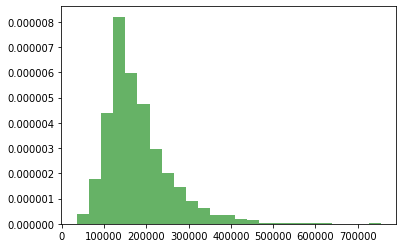

In [6]:
plt.hist(df_clean.SalePrice, bins=25, density=True, alpha=0.6, color='green')


*Tal y como muestra el gráfico, la distribución de los datos no sigue una distribución normal, ya que la mayoría de los datos no se agrupa en torno a la media, sino que se encuentran sesgados a la izquierda.*


## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

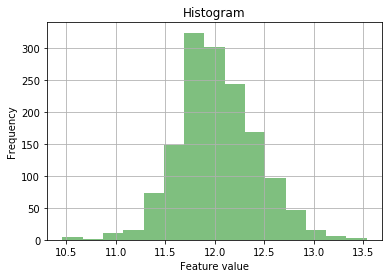

In [8]:
# Aplicar el logaritmo a la columna Saleprice
data = df_clean.SalePrice
data_log = data.apply(np.log)   
# Plotear los resultados para ver qué tal
data_log.plot.hist(alpha=0.5, bins=15, grid=True, legend=None, color = "green")
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

In [9]:
# Añadir los datos ajustados
df_clean["SalePriceAdjusted"] = data_log

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [12]:
# Chuletilla de lo que es cada cosa
# GrLivArea = Above grade (ground) living area square feet
# LotArea = Lot size in square feet
# GarageArea = Size of garage in square feet
# BsmtFullBath = Basement full bathrooms
# BsmtHalfBath = Basement half bathrooms

# Crear nuevas relaciones
# Edad que tenía la casa cuando se vendió. Queremos ver si las casas más nuevas tienen mejor precio
df_clean["Age"] = df_clean.YrSold - df_clean.YearBuilt

# Años desde la remodelación hasta su venta, para ver si las remodelaciones recientes influuyen en el precio
df_clean["AgeRemod"] = df_clean.YrSold - df_clean.YearRemodAdd

# Número total de baños. Agrupar todos los baños de la casa.
df_clean["total_bath"] = df_clean.FullBath + df_clean.HalfBath + df_clean.BsmtFullBath + df_clean.BsmtHalfBath

# Relación entre baños y número de habitaciones. Ver si se valora en el precio que una casa si el ratio entre 
# número de habitaciones y número de baños en la planta superior es próximo a uno.
df_clean["bedrooms_baths"] = df_clean.BedroomAbvGr/(df_clean.FullBath + df_clean.HalfBath)

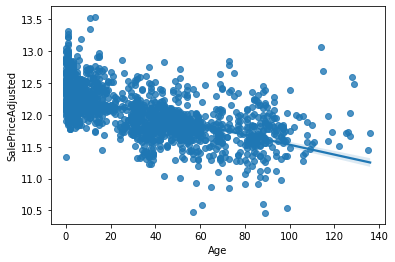

In [13]:
# Gráficos
# Tiempo que ha pasado desde que se construyó hasta que se vendió
ax = sns.regplot(x="Age", y="SalePriceAdjusted", data=df_clean)

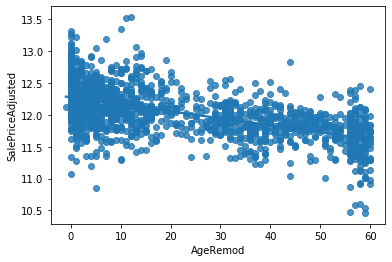

In [14]:
# Tiempo que ha pasado desde que se remodeló hasta que se vendió
ax2 = sns.regplot(x="AgeRemod", y="SalePriceAdjusted", data=df_clean)

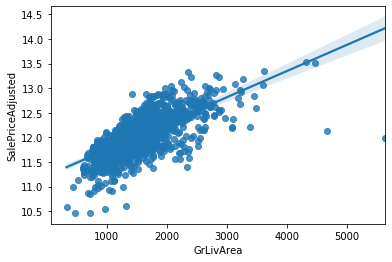

In [15]:
# Superficie construida y precio
ax3 = sns.regplot(x="GrLivArea", y="SalePriceAdjusted", data=df_clean)

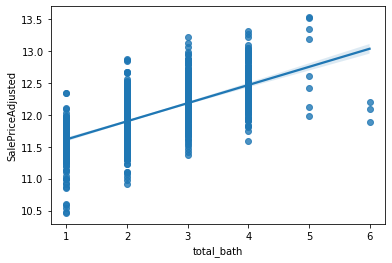

In [16]:
# Número total de baños 
ax4 = sns.regplot(x="total_bath", y="SalePriceAdjusted", data=df_clean)

/home/lee/anaconda3/lib/python3.7/site-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/lee/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


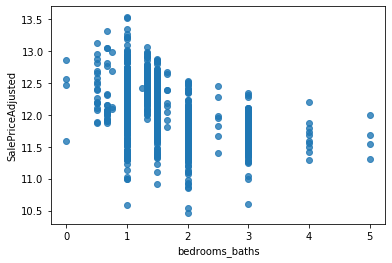

In [17]:
# Proporción entre número de habitaciones/número de baños
ax5 = sns.regplot(x="bedrooms_baths", y="SalePriceAdjusted", data=df_clean)

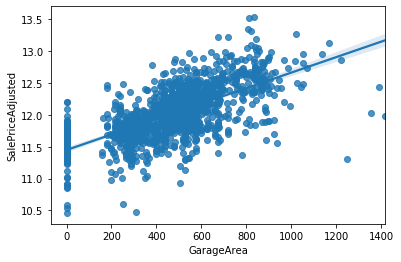

In [18]:
# Garage Area
ax6 = sns.regplot(x="GarageArea", y="SalePriceAdjusted", data=df_clean)

[Text(0, 0, 'CollgCr'),
 Text(0, 0, 'Veenker'),
 Text(0, 0, 'Crawfor'),
 Text(0, 0, 'NoRidge'),
 Text(0, 0, 'Mitchel'),
 Text(0, 0, 'Somerst'),
 Text(0, 0, 'NWAmes'),
 Text(0, 0, 'OldTown'),
 Text(0, 0, 'BrkSide'),
 Text(0, 0, 'Sawyer'),
 Text(0, 0, 'NridgHt'),
 Text(0, 0, 'NAmes'),
 Text(0, 0, 'SawyerW'),
 Text(0, 0, 'IDOTRR'),
 Text(0, 0, 'MeadowV'),
 Text(0, 0, 'Edwards'),
 Text(0, 0, 'Timber'),
 Text(0, 0, 'Gilbert'),
 Text(0, 0, 'StoneBr'),
 Text(0, 0, 'ClearCr'),
 Text(0, 0, 'NPkVill'),
 Text(0, 0, 'Blmngtn'),
 Text(0, 0, 'BrDale'),
 Text(0, 0, 'SWISU'),
 Text(0, 0, 'Blueste')]

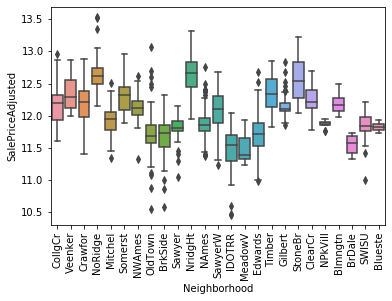

In [19]:
# Ver si hay diferencias notables de precios entre las ventas de cada barrio. Parece que hay unos 4 barrios que 
# son más caros que el resto: NoRidge, NridgHt, Timber y StoneBr.

ax7 = sns.boxplot(x="Neighborhood", y="SalePriceAdjusted", data=df_clean)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=90)


## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

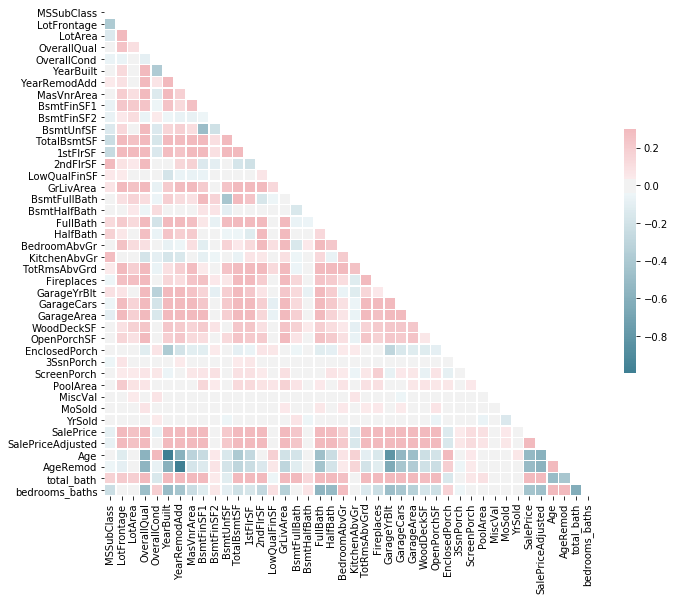

In [20]:
# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [21]:
# Voy a sacar la columna de valores para ver mejor las correlaciones
corr[["SalePriceAdjusted"]].sort_values("SalePriceAdjusted")

,SalePriceAdjusted
Age,-0.587290
AgeRemod,-0.568136
bedrooms_baths,-0.466662
EnclosedPorch,-0.149050
KitchenAbvGr,-0.147548
MSSubClass,-0.073959
LowQualFinSF,-0.037963
YrSold,-0.037263
OverallCond,-0.036868
MiscVal,-0.020021


In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

De acuerdo al gráfico (y a la tabla) las variables que están más relacionadas (tomando sus valores de correlación en valor absoluto) son:
* OverallQual
* GrLivArea
* GarageCars
* total_bath
* GarageArea

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

### 1. Overall quality
La calidad de la construcción es lo que más se valora en el precio de una casa. Las casas con mejores calidades son las que mejor se pagan.

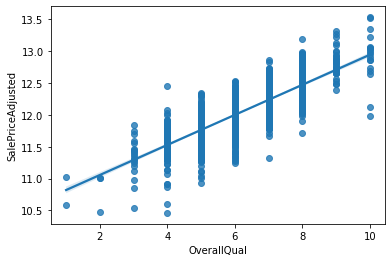

In [22]:
sns.regplot(x="OverallQual", y="SalePriceAdjusted", data=df_clean)

### 2. GrLivArea. 
El segundo factor que más influye en el precio es la superficie construida habitable en el lote que se vende. A mayor superficie, mayor es el precio que se paga, como es lógico y como se puede extraer de la gráfica.

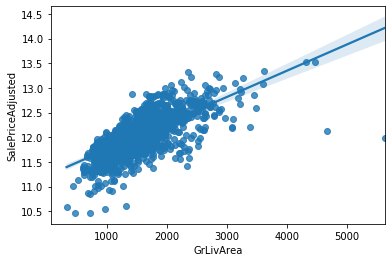

In [23]:
sns.regplot(x="GrLivArea", y="SalePriceAdjusted", data=df_clean)

### 3. GarageCars
Esta variable hace referencia al tamaño del garage expresado en el número de coches que es capaz de albergar. De la gráfica se observa que a partir de garages de más de 3 coches de capacidad el precio ya no se ve tan influenciado.

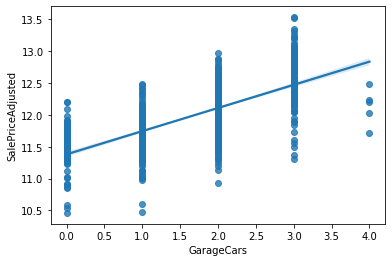

In [24]:
sns.regplot(x="GarageCars", y="SalePriceAdjusted", data=df_clean)

### 4. Total_bath
El número total de baños, incluyendo baños enteros y semibaños, ya sean del piso superior o del sótano también influye de forma positiva en el precio. Parece que a partir de 5 baños, éste número deja de ser importante para el precio de una casa, según se desprende de la gráfica.

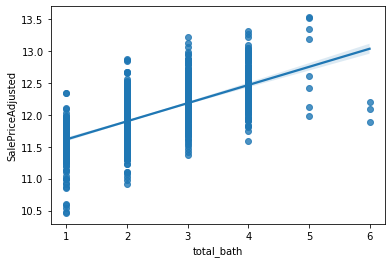

In [25]:
sns.regplot(x="total_bath", y="SalePriceAdjusted", data=df_clean)

### 5. GarageArea
Al igual que la capacidad del garage, el área, que está intrínsecamente relacionada con ésta, también influye de forma positiva en el precio de venta. Como comentario, esta variable se podría eliminar porque no aporta nada nuevo al análisis y es colineal con `GarageCars`.

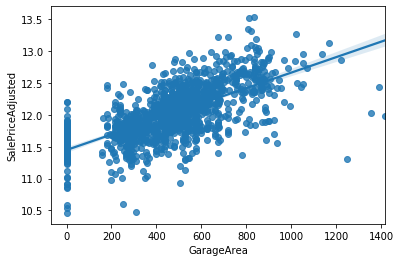

In [26]:
sns.regplot(x="GarageArea", y="SalePriceAdjusted", data=df_clean)